Date : 02/02/2026

### 🌟 Feature Scaling
✅ What is Feature Scaling?

Feature Scaling = Converting all input features into the same scale (range) so that ML algorithms work properly and faster.

Because ML algorithms compare numbers.  
If one feature has very big values and another has small values, the model becomes biased.

❌ Problem without Feature Scaling

Example dataset:

| Height (cm) | Weight (kg) |
| ----------- | ----------- |
| 160         | 55          |
| 180         | 75          |

Height range = 150–190  
Weight range = 40–90

Algorithms like KNN, SVM, Logistic Regression, Gradient Descent use distance → so large values dominate small ones ❌  

✅ Why Feature Scaling is needed?

- Improves accuracy
- Faster training
- Avoids bias toward large-value features

Required for:

- KNN
- SVM
- Logistic Regression
- Neural Networks
- PCA

Not mandatory for:

- Decision Tree
- Random Forest

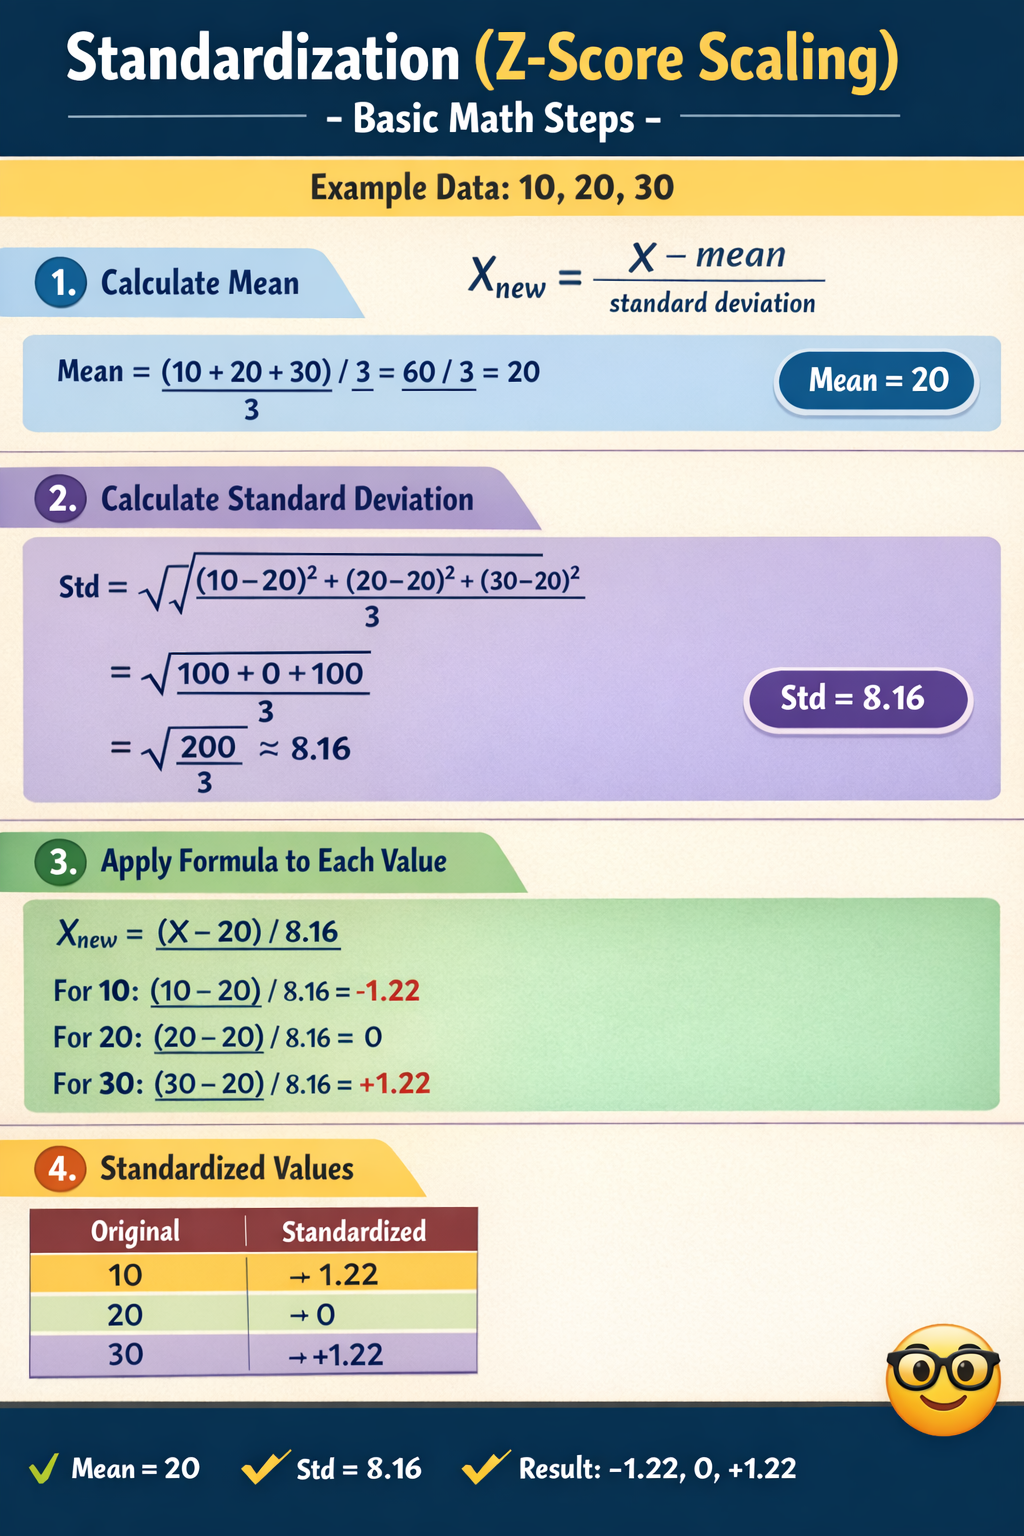

In [38]:

import numpy as np      # linear algebra
import pandas as pd     # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('Social_Network_Ads.csv')

In [40]:
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


Train-Test split

In [41]:
'''
    Meaning:
        X = what model learns from
        y = what model predicts
'''

x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

🌟Why we split the data?

If we train on full data, model will memorize it.

So we split into:

Training data → to teach the model  
Testing data → to check accuracy on new data

Usually:

80% training  
20% testing

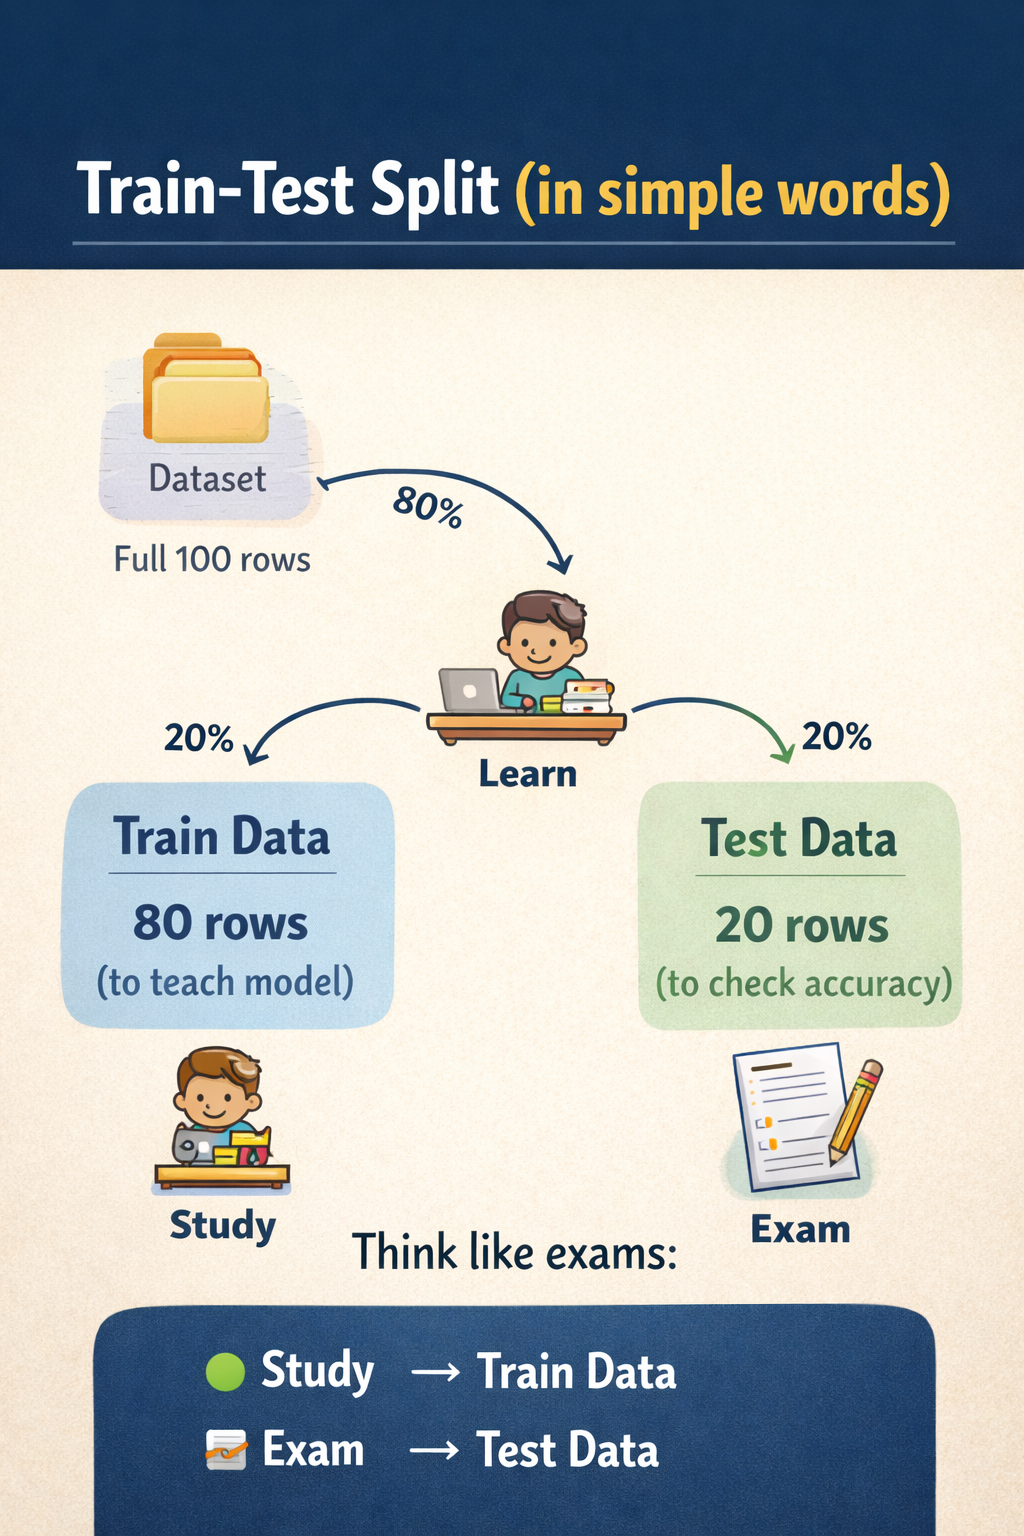

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [44]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (320, 2)
X_test shape: (80, 2)
y_train shape: (320,)
y_test shape: (80,)


Standardization

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
x_scaled = scaler.fit_transform(x)

In [48]:
pd.DataFrame(x_scaled).describe()

0             1
count  4.000000e+02  4.000000e+02
mean  -7.105427e-17 -1.776357e-17
std    1.001252e+00  1.001252e+00
min   -1.877311e+00 -1.607506e+00
25%   -7.550313e-01 -7.852897e-01
50%   -6.256110e-02  7.561451e-03
75%    7.970571e-01  5.361289e-01
max    2.134241e+00  2.356750e+00

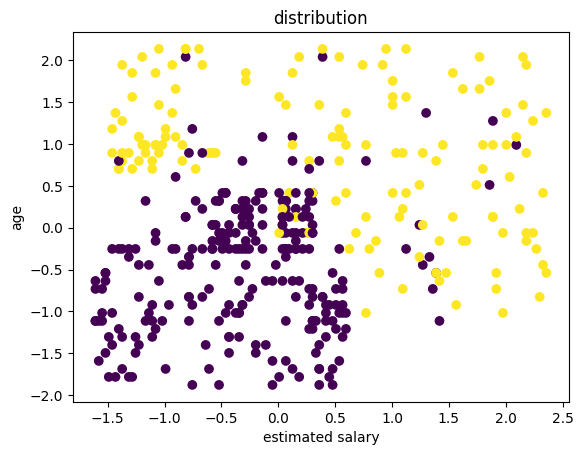

In [49]:
plt.title("distribution")
plt.xlabel("estimated salary")
plt.ylabel("age")
plt.scatter(x_scaled[:, 1], x_scaled[:, 0], c = df['Purchased'])

In [50]:
df

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [51]:
df.describe()

User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()

In [54]:
''' 
    fit(x) -> Finds the minimum (min) and maximum (max) value of each column in x.
    transform(x) -> Then it applies this formula to every value:
        x(new) = x-min/max-min
        So all values become between 0 and 1.
'''

x_scaled = scaler.fit_transform(x)

In [55]:
x_scaled

array([[0.02380952, 0.02962963],
       [0.4047619 , 0.03703704],
       [0.19047619, 0.20740741],
       [0.21428571, 0.31111111],
       [0.02380952, 0.45185185],
       [0.21428571, 0.31851852],
       [0.21428571, 0.51111111],
       [0.33333333, 1.        ],
       [0.16666667, 0.13333333],
       [0.4047619 , 0.37037037],
       [0.19047619, 0.48148148],
       [0.19047619, 0.27407407],
       [0.04761905, 0.52592593],
       [0.33333333, 0.02222222],
       [0.        , 0.4962963 ],
       [0.26190476, 0.48148148],
       [0.69047619, 0.07407407],
       [0.64285714, 0.08148148],
       [0.66666667, 0.0962963 ],
       [0.71428571, 0.1037037 ],
       [0.64285714, 0.05185185],
       [0.69047619, 0.25185185],
       [0.71428571, 0.19259259],
       [0.64285714, 0.05185185],
       [0.66666667, 0.05925926],
       [0.69047619, 0.03703704],
       [0.73809524, 0.0962963 ],
       [0.69047619, 0.11111111],
       [0.26190476, 0.20740741],
       [0.30952381, 0.02222222],
       [0.

In [56]:
x_scaled[:, 0].max(), x_scaled[:, 0].min()

(np.float64(0.9999999999999998), np.float64(0.0))

In [57]:
x_scaled[:, 1].max(), x_scaled[:, 1].min()

(np.float64(1.0), np.float64(0.0))

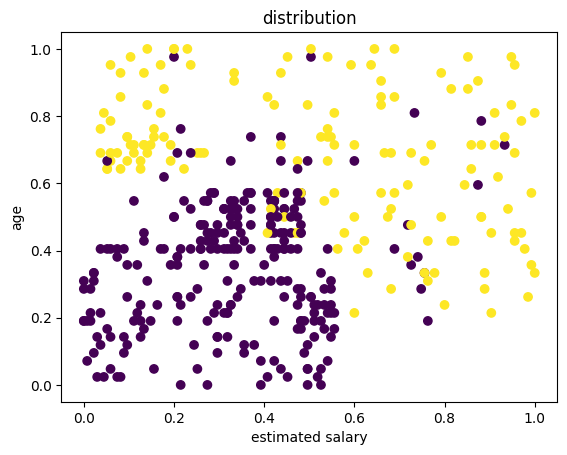

In [58]:
plt.title("distribution")
plt.xlabel("estimated salary")
plt.ylabel("age")
plt.scatter(x_scaled[:, 1], x_scaled[:, 0], c = df['Purchased']);

| Feature               | Standardization           | Normalization                    |
| --------------------- | ------------------------- | -------------------------------- |
| Range                 | No fixed range            | 0 to 1                           |
| Mean                  | 0                         | Not necessarily 0                |
| Standard deviation    | 1                         | Not fixed                        |
| Formula               | (x − mean) / std          | (x − min) / (max − min)          |
| Negative values       | Yes                       | No                               |
| Sensitive to outliers | Yes                       | Yes                              |
| Best for              | Regression, SVM, PCA, KNN | Neural Networks, KNN, Image data |
| Scaler used           | StandardScaler            | MinMaxScaler                     |